# 

- **Questions**: [Here](../data/homework_2/HW2.pdf)
- **Answer Set** : NO. 02
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 610301060


## Importing Needed Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1.

### a.

In [2]:
img1 = cv2.imread('image1.jpg', 0)
filtered_img1 = cv2.blur(img1, (5, 5))

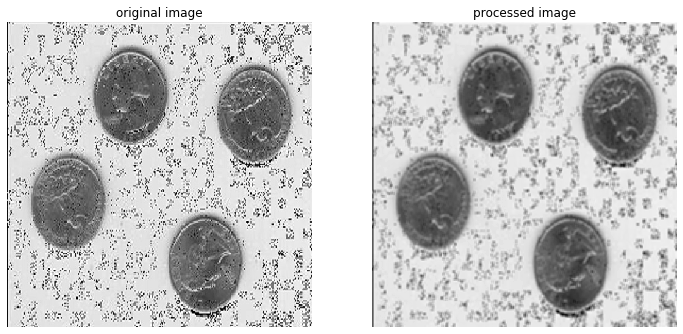

In [3]:
plt.figure(figsize=(12, 14))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('processed image')
plt.imshow(filtered_img1, cmap='gray')
plt.axis('off')

plt.show()

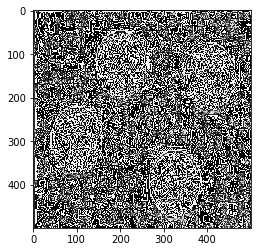

In [4]:
plt.imshow(img1-filtered_img1, cmap='gray')

### b.

In [5]:
img2 = cv2.imread('image2.jpg', 0)
filtered_img2 = cv2.medianBlur(img2, 5)

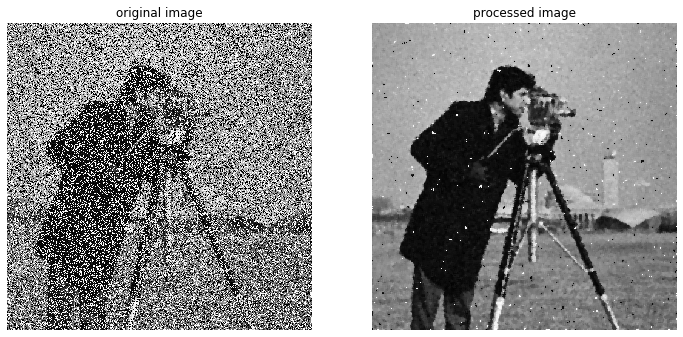

In [6]:
plt.figure(figsize=(12, 14))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('processed image')
plt.imshow(filtered_img2, cmap='gray')
plt.axis('off')

plt.show()

### c.

In [7]:
img3 = cv2.imread('image3.jpg', 0)
filtered_img3 = cv2.Laplacian(img3, cv2.CV_16S, ksize=5)

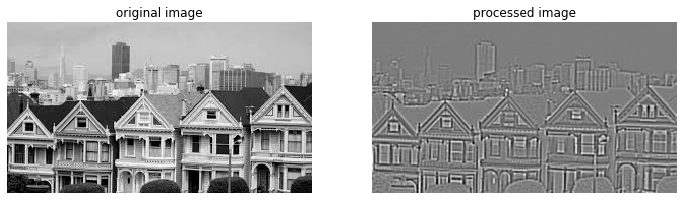

In [8]:
plt.figure(figsize=(12, 14))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(img3, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('processed image')
plt.imshow(filtered_img3, cmap='gray')
plt.axis('off')

plt.show()

### d.

In [9]:
img4 = cv2.imread('image4.jpg', 0)
filtered_img4 = cv2.Sobel(img4, cv2.CV_64F, 1, 1, ksize=7)

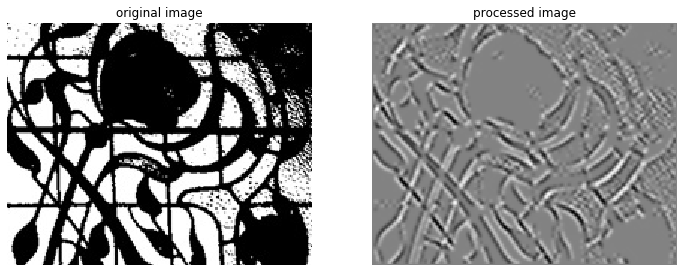

In [10]:
plt.figure(figsize=(12, 14))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(img4, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('processed image')
plt.imshow(filtered_img4, cmap='gray')
plt.axis('off')

plt.show()

## 2.

### a.

In [11]:
img5 = cv2.imread('image5.jpg', 0)

In [12]:
img5_fft = np.fft.fft2(img5)
img5_fftshift = np.fft.fftshift(img5_fft)

In [13]:
magnitude_spectrum_img5_fft =np.log(np.abs(img5_fft))
magnitude_spectrum_img5_fftshift = np.log(np.abs(img5_fftshift))

In [14]:
img5_ifftshift = np.fft.ifftshift(img5_fftshift)
img5_ifft = np.fft.ifft2(img5_ifftshift)

In [15]:
magnitude_spectrum_img5_ifftshift = np.log(np.abs(img5_ifftshift))

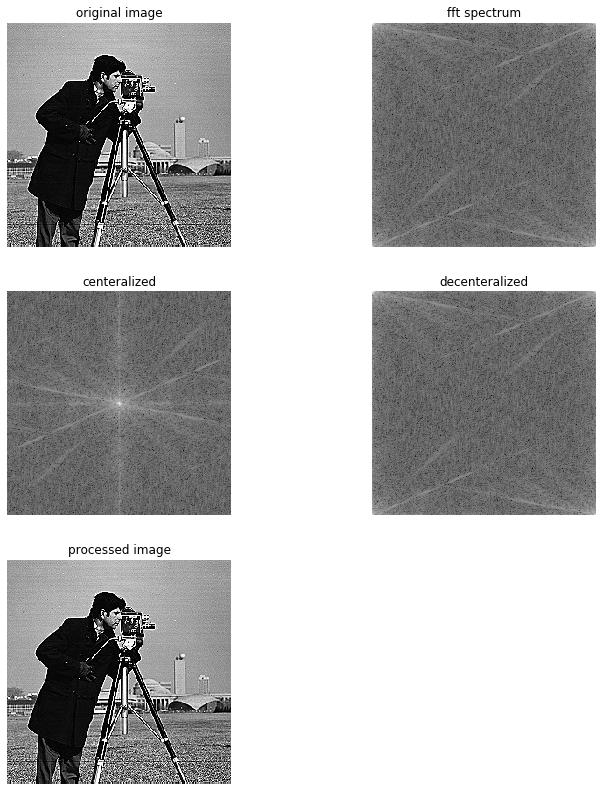

In [16]:
plt.figure(figsize=(12, 14))

plt.subplot(3, 2, 1)
plt.title('original image')
plt.imshow(img5, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('fft spectrum')
plt.imshow(magnitude_spectrum_img5_fft, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('centeralized')
plt.imshow(magnitude_spectrum_img5_fftshift, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('decenteralized')
plt.imshow(magnitude_spectrum_img5_ifftshift, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('processed image')
plt.imshow(np.abs(img5_ifft), cmap='gray')
plt.axis('off')

plt.show()

### b.

Defining low pass and high pass filter functions:

In [17]:
def low_pass_filter(rows, cols, r):
    lpf = np.zeros((rows, cols))
    for x in range(0, r):
        lpf[int(rows/2) - x: int(rows/2) + x, 
            int(cols/2) - int((r**2 - x**2)**0.5): int(cols/2) + int((r**2 - x**2)**0.5)] = 1
    return lpf

def high_pass_filter(rows, cols, r):
    return 1 - low_pass_filter(rows, cols, r) 

Low pass filter:

In [18]:
rows, cols = img5_fft.shape
lpf = low_pass_filter(rows, cols, 50)

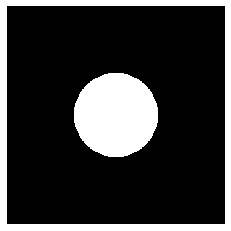

In [19]:
plt.imshow(255*lpf, cmap='gray')
plt.axis('off')

plt.show()

In [20]:
img5_low_filtered = np.fft.ifft2(np.fft.ifftshift(img5_fftshift*lpf))

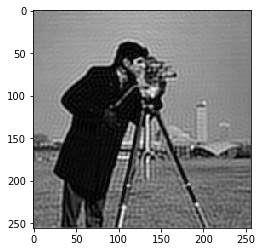

In [21]:
plt.imshow(np.abs(img5_low_filtered), cmap='gray')

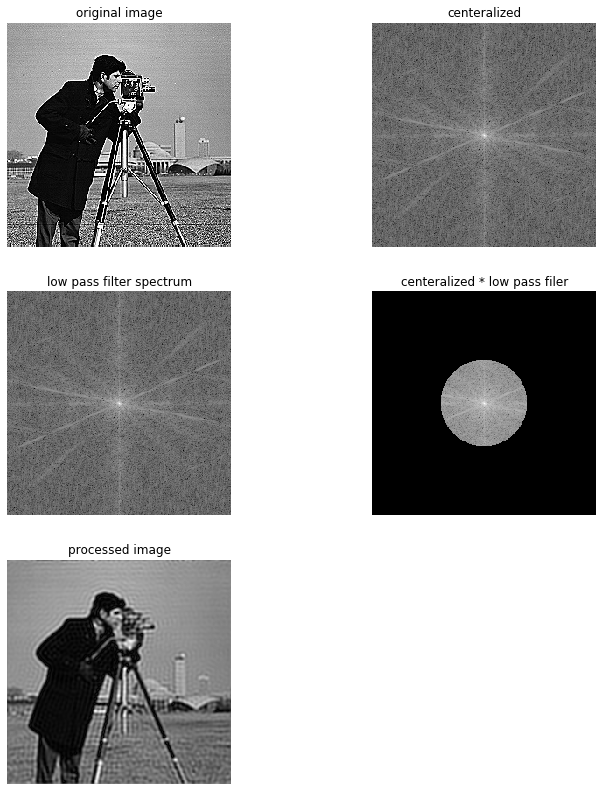

In [22]:
plt.figure(figsize=(12, 14))

plt.subplot(3, 2, 1)
plt.title('original image')
plt.imshow(img5, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('centeralized')
plt.imshow(magnitude_spectrum_img5_fftshift, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('low pass filter spectrum')
plt.imshow(magnitude_spectrum_img5_fftshift, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('centeralized * low pass filer')
plt.imshow(magnitude_spectrum_img5_fftshift * lpf, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('processed image')
plt.imshow(np.abs(img5_low_filtered), cmap='gray')
plt.axis('off')

plt.show()

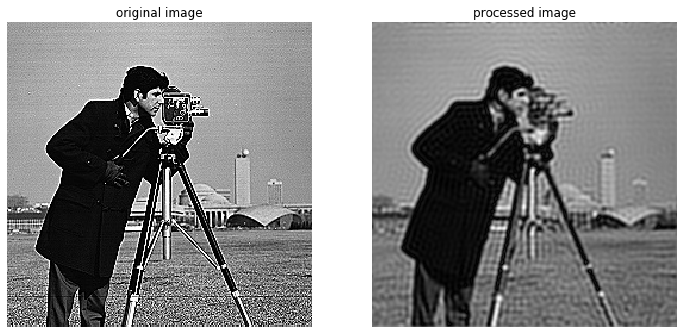

In [23]:
plt.figure(figsize=(12, 14))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(img5, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('processed image')
plt.imshow(np.abs(img5_low_filtered), cmap='gray')
plt.axis('off')

plt.show()

High pass filter:

In [24]:
hpf = high_pass_filter(rows, cols, 50)

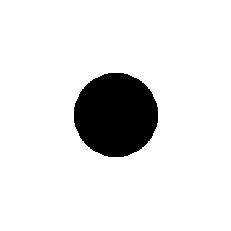

In [25]:
plt.imshow(255*hpf, cmap='gray')
plt.axis('off')
plt.show()

In [26]:
img5_high_filtered = np.fft.ifft2(np.fft.ifftshift(img5_fftshift*hpf))

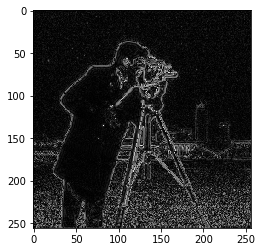

In [27]:
plt.imshow(np.abs(img5_high_filtered), cmap='gray')

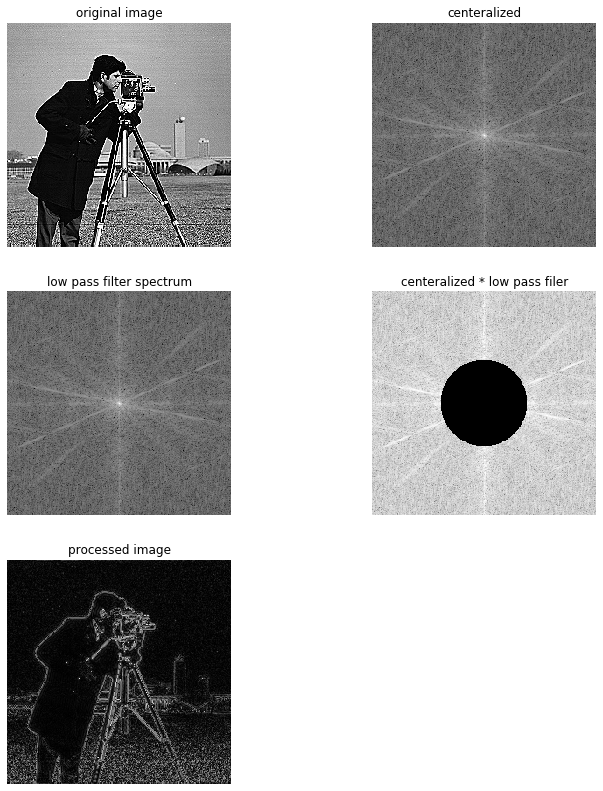

In [28]:
plt.figure(figsize=(12, 14))

plt.subplot(3, 2, 1)
plt.title('original image')
plt.imshow(img5, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('centeralized')
plt.imshow(magnitude_spectrum_img5_fftshift, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('low pass filter spectrum')
plt.imshow(magnitude_spectrum_img5_fftshift, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('centeralized * low pass filer')
plt.imshow(magnitude_spectrum_img5_fftshift * hpf, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('processed image')
plt.imshow(np.abs(img5_high_filtered), cmap='gray')
plt.axis('off')

plt.show()

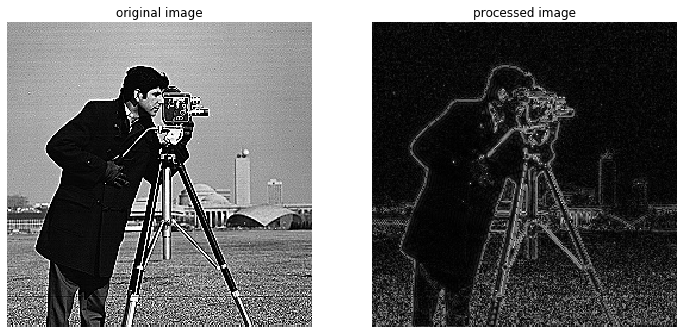

In [29]:
plt.figure(figsize=(12, 14))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(img5, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('processed image')
plt.imshow(np.abs(img5_high_filtered), cmap='gray')
plt.axis('off')

plt.show()

## c.

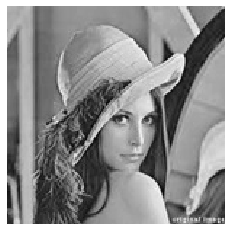

In [30]:
img6 = cv2.imread('image6.jpg', 0)

plt.imshow(img6, cmap='gray')
plt.axis('off')
plt.show()

In [31]:
img6_gussian_3 = cv2.GaussianBlur(img6, (3, 3), 0)
img6_gussian_5 = cv2.GaussianBlur(img6, (5, 5), 0)
img6_gussian_7 = cv2.GaussianBlur(img6, (7, 7), 0)
img6_gussian_9 = cv2.GaussianBlur(img6, (9, 9), 0)

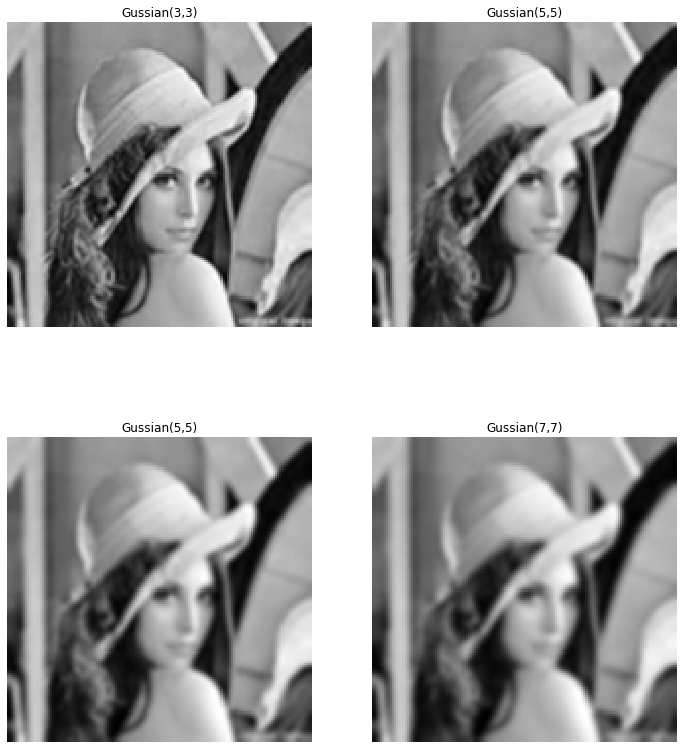

In [32]:
plt.figure(figsize=(12, 14))

plt.subplot(2, 2, 1)
plt.title('Gussian(3,3)')
plt.imshow(img6_gussian_3, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Gussian(5,5)')
plt.imshow(img6_gussian_5, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Gussian(5,5)')
plt.imshow(img6_gussian_7, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Gussian(7,7)')
plt.imshow(img6_gussian_9, cmap='gray')
plt.axis('off')

plt.show()

## 3.

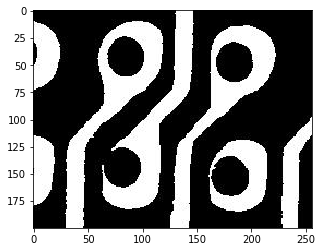

In [33]:
holes = cv2.imread('holes.jpg', 0)
plt.imshow(holes, cmap='gray')

In [34]:
# Apply morphological closing to fill holes in objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(holes, cv2.MORPH_CLOSE, kernel)

# Find contours in the image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to count number of holes and their diameter
num_holes = 0
hole_diameters = []

# Loop over the contours and measure their diameter
for i, contour in enumerate(contours):
    # Calculate the diameter of the contour using the area
    area = cv2.contourArea(contour)
    diameter = np.sqrt(4 * area / np.pi)

    # Check if contour is a hole based on its area
    if area > 3000:
        num_holes += 1
        hole_diameters.append(diameter)
        print(f"Hole {num_holes} has a diameter of {diameter:.2f} pixels")


Hole 1 has a diameter of 66.79 pixels
Hole 2 has a diameter of 90.70 pixels
Hole 3 has a diameter of 102.63 pixels
Hole 4 has a diameter of 90.73 pixels


In [35]:
num_holes

4

In [36]:
hole_diameters

[66.78918134682924, 90.69599814083044, 102.62979164853465, 90.73459591719998]